In [1]:
# Load Numpy package
# Load Pandas package
# Load Datetime package
# Load MatPlotLib package
# Load Seaborn package
# Load Regular Expression package
# Load SpaCy package 
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy

# Load Natural Language Toolkit
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

# Load the various components from the trained English pipelines
nlp = spacy.load('en_core_web_lg')

print("Load Complete")

Load Complete


In [2]:
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to /tmp/pip-install-q0ljfnp7/twint_10f573cded93400f986cdd3b01f4a09c
  Running command git clone --filter=blob:none --quiet https://github.com/twintproject/twint.git /tmp/pip-install-q0ljfnp7/twint_10f573cded93400f986cdd3b01f4a09c
  Running command git checkout -q origin/master
  Resolved https://github.com/twintproject/twint.git to commit origin/master
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.7/263.7 kB 427.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.6/384.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 3.8 MB/s eta 0:00:00
  Created wheel for twint: 

In [3]:
# Use the following to solve compatibility issues with notebooks and RunTime errors.
import nest_asyncio
nest_asyncio.apply()

# Load Twint package
import twint

# Specify the settings for the function: Twitter user, limit, etc. for the Twitter search
c = twint.Config()

c.Search = "covid19"
c.Lang = "en"
c.Limit = 100
c.Pandas = True
c.Pandas_clean = True
c.Hide_output = True

# Initiate the Twitter search
twint.run.Search(c)

# Store the Twitter search results 
data = twint.storage.panda.Tweets_df

In [4]:
# Check the Twitter search results (using a couple columns as example)
columns = ['date', 'username', 'tweet']
data[columns]

,date,username,tweet
0,2022-09-27 02:21:15,Tian_A1,#Sanofi teams up with Tiger Pistol for pharmac...
1,2022-09-27 02:21:12,Terry85206,@ClaudetteGGibs1 Got my 3rd Covid19 Booster
2,2022-09-27 02:21:12,epistolitas,Se pierden más de cinco millones de vacunas co...
3,2022-09-27 02:21:01,yatanew,.@covid19 im so drunkkkkkkkkk covidddddddddddd...
4,2022-09-27 02:21:00,Niigata_ped_lab,なかなか無料で読めるようにならないと思いすっかり忘れていましたが、気づいたら無料で読めるよう...
...,...,...,...
95,2022-09-27 02:04:06,ZncFq,🗣️help your self 🙏 The Solution For the Calami...
96,2022-09-27 02:03:52,xico_alexandre,.@simonetebetbr foi copiada. Não lutando cont...
97,2022-09-27 02:03:50,jayi_wang,"898/#COVID19 #coronavirus MON SEP 26, 2022 US ..."
98,2022-09-27 02:03:30,lovemoz1,🦠 Okay—everybody say it with me #Asymptomatic ...


In [5]:
# Isolate only the tweets from the Twitter search
tweets = data["tweet"]
tweets.head()

0    #Sanofi teams up with Tiger Pistol for pharmac...
1          @ClaudetteGGibs1 Got my 3rd Covid19 Booster
2    Se pierden más de cinco millones de vacunas co...
3    .@covid19 im so drunkkkkkkkkk covidddddddddddd...
4    なかなか無料で読めるようにならないと思いすっかり忘れていましたが、気づいたら無料で読めるよう...
Name: tweet, dtype: object

In [6]:
# Compile all text from the Tweets into a single list
all_tweets = []
for word in tweets:
    all_tweets.append(word)
all_tweets

['#Sanofi teams up with Tiger Pistol for pharmacy-level social media [  https://t.co/B5WJx1x0El ] To do this, the Big Pharma is teaming up with Texan advertising company #Pfizer whittles down US donation deal as global #Covid19 vaccine demand slumps.  https://t.co/o8GqDFFDo9',
 '@ClaudetteGGibs1 Got my 3rd Covid19 Booster',
 'Se pierden más de cinco millones de vacunas contra #COVID19  https://t.co/Tvq03GiAZx  https://t.co/vgA7w8HIrw',
 '.@covid19 im so drunkkkkkkkkk coviddddddddddddddddddd',
 'なかなか無料で読めるようにならないと思いすっかり忘れていましたが、気づいたら無料で読めるようになっていました‼️ #新潟大学小児科感染症班 から日本における小児 #COVID19 のレビューです🧬  https://t.co/OOX70Siz0H',
 'なんかバイト募集してたっけ？ さすがにこの量は一般人かな  安倍元首相国葬\u3000「住みやすい日本作ってくれた」「来れない友人の分も」\u3000一般献花に長い列(産経新聞) #Yahooニュース  https://t.co/rhrTHHray3',
 'How did Dana White keep UFC alive during COVID-19 pandemic?  https://t.co/A5xqAnmQwg  https://t.co/tTbj3NHe9f #Coronavirus #Covid19 #Cov19',
 'Santa María, San Cosme y San Damián ruega por todos los enfermos que hoy padecen, te invocamos y pe

In [7]:
# Tokenize the text simply by splitting the tweets up
lines = list()
for line in all_tweets:
    words = line.split()
    for w in words:
        lines.append(w)
lines

['#Sanofi',
 'teams',
 'up',
 'with',
 'Tiger',
 'Pistol',
 'for',
 'pharmacy-level',
 'social',
 'media',
 '[',
 'https://t.co/B5WJx1x0El',
 ']',
 'To',
 'do',
 'this,',
 'the',
 'Big',
 'Pharma',
 'is',
 'teaming',
 'up',
 'with',
 'Texan',
 'advertising',
 'company',
 '#Pfizer',
 'whittles',
 'down',
 'US',
 'donation',
 'deal',
 'as',
 'global',
 '#Covid19',
 'vaccine',
 'demand',
 'slumps.',
 'https://t.co/o8GqDFFDo9',
 '@ClaudetteGGibs1',
 'Got',
 'my',
 '3rd',
 'Covid19',
 'Booster',
 'Se',
 'pierden',
 'más',
 'de',
 'cinco',
 'millones',
 'de',
 'vacunas',
 'contra',
 '#COVID19',
 'https://t.co/Tvq03GiAZx',
 'https://t.co/vgA7w8HIrw',
 '.@covid19',
 'im',
 'so',
 'drunkkkkkkkkk',
 'coviddddddddddddddddddd',
 'なかなか無料で読めるようにならないと思いすっかり忘れていましたが、気づいたら無料で読めるようになっていました‼️',
 '#新潟大学小児科感染症班',
 'から日本における小児',
 '#COVID19',
 'のレビューです🧬',
 'https://t.co/OOX70Siz0H',
 'なんかバイト募集してたっけ？',
 'さすがにこの量は一般人かな',
 '安倍元首相国葬',
 '「住みやすい日本作ってくれた」「来れない友人の分も」',
 '一般献花に長い列(産経新聞)',
 '#Yahooニュース',
 'https://t.c

In [8]:
# Replace punctuations, hashtags, special characters, etc. with nothing
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]
lines

['Sanofi',
 'teams',
 'up',
 'with',
 'Tiger',
 'Pistol',
 'for',
 'pharmacylevel',
 'social',
 'media',
 '',
 'httpstcoB5WJx1x0El',
 '',
 'To',
 'do',
 'this',
 'the',
 'Big',
 'Pharma',
 'is',
 'teaming',
 'up',
 'with',
 'Texan',
 'advertising',
 'company',
 'Pfizer',
 'whittles',
 'down',
 'US',
 'donation',
 'deal',
 'as',
 'global',
 'Covid19',
 'vaccine',
 'demand',
 'slumps',
 'httpstcoo8GqDFFDo9',
 'ClaudetteGGibs1',
 'Got',
 'my',
 '3rd',
 'Covid19',
 'Booster',
 'Se',
 'pierden',
 'ms',
 'de',
 'cinco',
 'millones',
 'de',
 'vacunas',
 'contra',
 'COVID19',
 'httpstcoTvq03GiAZx',
 'httpstcovgA7w8HIrw',
 'covid19',
 'im',
 'so',
 'drunkkkkkkkkk',
 'coviddddddddddddddddddd',
 '',
 '',
 '',
 'COVID19',
 '',
 'httpstcoOOX70Siz0H',
 '',
 '',
 '',
 '',
 '',
 'Yahoo',
 'httpstcorhrTHHray3',
 'How',
 'did',
 'Dana',
 'White',
 'keep',
 'UFC',
 'alive',
 'during',
 'COVID19',
 'pandemic',
 'httpstcoA5xqAnmQwg',
 'httpstcotTbj3NHe9f',
 'Coronavirus',
 'Covid19',
 'Cov19',
 'Santa',
 '

In [9]:
# Remove the blanks('') that were left in the list
lines_2 = []
for word in lines:
    if word != '':
        lines_2.append(word)
lines_2

['Sanofi',
 'teams',
 'up',
 'with',
 'Tiger',
 'Pistol',
 'for',
 'pharmacylevel',
 'social',
 'media',
 'httpstcoB5WJx1x0El',
 'To',
 'do',
 'this',
 'the',
 'Big',
 'Pharma',
 'is',
 'teaming',
 'up',
 'with',
 'Texan',
 'advertising',
 'company',
 'Pfizer',
 'whittles',
 'down',
 'US',
 'donation',
 'deal',
 'as',
 'global',
 'Covid19',
 'vaccine',
 'demand',
 'slumps',
 'httpstcoo8GqDFFDo9',
 'ClaudetteGGibs1',
 'Got',
 'my',
 '3rd',
 'Covid19',
 'Booster',
 'Se',
 'pierden',
 'ms',
 'de',
 'cinco',
 'millones',
 'de',
 'vacunas',
 'contra',
 'COVID19',
 'httpstcoTvq03GiAZx',
 'httpstcovgA7w8HIrw',
 'covid19',
 'im',
 'so',
 'drunkkkkkkkkk',
 'coviddddddddddddddddddd',
 'COVID19',
 'httpstcoOOX70Siz0H',
 'Yahoo',
 'httpstcorhrTHHray3',
 'How',
 'did',
 'Dana',
 'White',
 'keep',
 'UFC',
 'alive',
 'during',
 'COVID19',
 'pandemic',
 'httpstcoA5xqAnmQwg',
 'httpstcotTbj3NHe9f',
 'Coronavirus',
 'Covid19',
 'Cov19',
 'Santa',
 'Mara',
 'San',
 'Cosme',
 'y',
 'San',
 'Damin',
 'rueg

In [10]:
# Make all text lowercase
lines_3 = []
for word in lines_2:
    lines_3.append(word.lower())
lines_3

['sanofi',
 'teams',
 'up',
 'with',
 'tiger',
 'pistol',
 'for',
 'pharmacylevel',
 'social',
 'media',
 'httpstcob5wjx1x0el',
 'to',
 'do',
 'this',
 'the',
 'big',
 'pharma',
 'is',
 'teaming',
 'up',
 'with',
 'texan',
 'advertising',
 'company',
 'pfizer',
 'whittles',
 'down',
 'us',
 'donation',
 'deal',
 'as',
 'global',
 'covid19',
 'vaccine',
 'demand',
 'slumps',
 'httpstcoo8gqdffdo9',
 'claudetteggibs1',
 'got',
 'my',
 '3rd',
 'covid19',
 'booster',
 'se',
 'pierden',
 'ms',
 'de',
 'cinco',
 'millones',
 'de',
 'vacunas',
 'contra',
 'covid19',
 'httpstcotvq03giazx',
 'httpstcovga7w8hirw',
 'covid19',
 'im',
 'so',
 'drunkkkkkkkkk',
 'coviddddddddddddddddddd',
 'covid19',
 'httpstcooox70siz0h',
 'yahoo',
 'httpstcorhrthhray3',
 'how',
 'did',
 'dana',
 'white',
 'keep',
 'ufc',
 'alive',
 'during',
 'covid19',
 'pandemic',
 'httpstcoa5xqanmqwg',
 'httpstcottbj3nhe9f',
 'coronavirus',
 'covid19',
 'cov19',
 'santa',
 'mara',
 'san',
 'cosme',
 'y',
 'san',
 'damin',
 'rueg

In [11]:
# Using the stemmer from NLTK, we apply it to our list to get the roots
s_stemmer = SnowballStemmer(language = "english")
roots = []
for word in lines_3:
    roots.append(s_stemmer.stem(word))
roots

['sanofi',
 'team',
 'up',
 'with',
 'tiger',
 'pistol',
 'for',
 'pharmacylevel',
 'social',
 'media',
 'httpstcob5wjx1x0el',
 'to',
 'do',
 'this',
 'the',
 'big',
 'pharma',
 'is',
 'team',
 'up',
 'with',
 'texan',
 'advertis',
 'compani',
 'pfizer',
 'whittl',
 'down',
 'us',
 'donat',
 'deal',
 'as',
 'global',
 'covid19',
 'vaccin',
 'demand',
 'slump',
 'httpstcoo8gqdffdo9',
 'claudetteggibs1',
 'got',
 'my',
 '3rd',
 'covid19',
 'booster',
 'se',
 'pierden',
 'ms',
 'de',
 'cinco',
 'millon',
 'de',
 'vacuna',
 'contra',
 'covid19',
 'httpstcotvq03giazx',
 'httpstcovga7w8hirw',
 'covid19',
 'im',
 'so',
 'drunkkkkkkkkk',
 'coviddddddddddddddddddd',
 'covid19',
 'httpstcooox70siz0h',
 'yahoo',
 'httpstcorhrthhray3',
 'how',
 'did',
 'dana',
 'white',
 'keep',
 'ufc',
 'aliv',
 'dure',
 'covid19',
 'pandem',
 'httpstcoa5xqanmqwg',
 'httpstcottbj3nhe9f',
 'coronavirus',
 'covid19',
 'cov19',
 'santa',
 'mara',
 'san',
 'cosm',
 'y',
 'san',
 'damin',
 'ruega',
 'por',
 'todo',
 '

In [12]:
# Remove all stop words defined by NLTK from our list
roots_2 = []
for word in roots:
    if word not in nlp.Defaults.stop_words:
        roots_2.append(word)
roots_2

['sanofi',
 'team',
 'tiger',
 'pistol',
 'pharmacylevel',
 'social',
 'media',
 'httpstcob5wjx1x0el',
 'big',
 'pharma',
 'team',
 'texan',
 'advertis',
 'compani',
 'pfizer',
 'whittl',
 'donat',
 'deal',
 'global',
 'covid19',
 'vaccin',
 'demand',
 'slump',
 'httpstcoo8gqdffdo9',
 'claudetteggibs1',
 'got',
 '3rd',
 'covid19',
 'booster',
 'se',
 'pierden',
 'ms',
 'de',
 'cinco',
 'millon',
 'de',
 'vacuna',
 'contra',
 'covid19',
 'httpstcotvq03giazx',
 'httpstcovga7w8hirw',
 'covid19',
 'im',
 'drunkkkkkkkkk',
 'coviddddddddddddddddddd',
 'covid19',
 'httpstcooox70siz0h',
 'yahoo',
 'httpstcorhrthhray3',
 'dana',
 'white',
 'ufc',
 'aliv',
 'dure',
 'covid19',
 'pandem',
 'httpstcoa5xqanmqwg',
 'httpstcottbj3nhe9f',
 'coronavirus',
 'covid19',
 'cov19',
 'santa',
 'mara',
 'san',
 'cosm',
 'y',
 'san',
 'damin',
 'ruega',
 'por',
 'todo',
 'los',
 'enfermo',
 'que',
 'hoy',
 'padecen',
 'te',
 'invocamo',
 'y',
 'pedimo',
 'por',
 'la',
 'gracia',
 'de',
 'dio',
 'amn',
 '2septi

In [13]:
# Using the FreqDist function within NLTK, we get the frequencies of the words
from nltk.probability import FreqDist
frequency_count = FreqDist(roots_2)
frequency_count

FreqDist({'covid19': 99, 'de': 52, 'war': 18, 'la': 17, 'vaccin': 14, 'en': 14, 'que': 13, 'por': 12, 'coronavirus': 11, 'y': 11, ...})

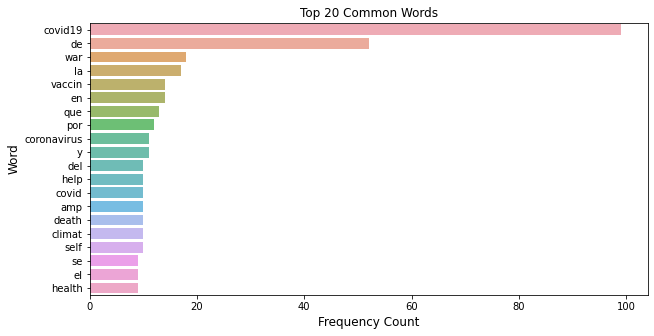

In [14]:
# Using FreqDist to find the 20 most common words
most_common = FreqDist(frequency_count).most_common(20)

# Convert the above to a Pandas series via Python Dictionary
most_common = pd.Series(dict(most_common))

# Generate a bar graph showing the top 20 most common words
plt.figure(figsize=(10,5))
sns.barplot(x=most_common.values, y=most_common.index, alpha=0.8)
plt.title('Top 20 Common Words')
plt.xlabel('Frequency Count', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.show()

In [15]:
# Tranform the preprocessed list of words into a DataFrame for analysis
new_data = pd.DataFrame(roots_2)
new_data = new_data[0].value_counts()
new_data

covid19          99
de               52
war              18
la               17
vaccin           14
                 ..
marker            1
bloodbrain        1
barrier           1
disruptionear     1
conseq            1
Name: 0, Length: 1198, dtype: int64

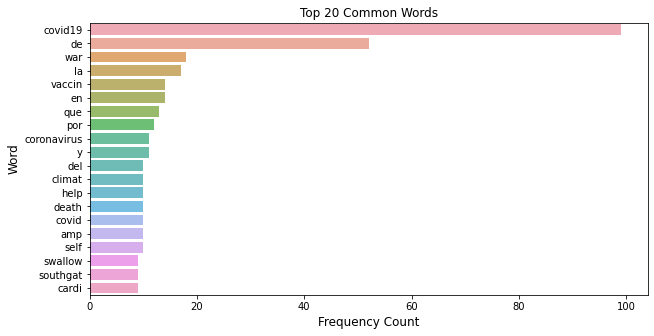

In [16]:
# Generate a bar graph showing the top 20 most common words (same as previous graph)
new_data = new_data[:20,]
plt.figure(figsize=(10,5))
sns.barplot(x=new_data.values, y=new_data.index, alpha=0.8)
plt.title('Top 20 Common Words')
plt.ylabel('Word', fontsize=12)
plt.xlabel('Frequency Count', fontsize=12)
plt.show()